# INM 427 Neural Networks Individual Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('smoke_detection_iot.csv')
df.head(10)
#We import the dataset and show the first 10 rows.

#The task we are trying to solve is a binary classification task as we aim to build and compare a MLP model with 3 hidden layers
#and a SVM model by predicting smoke detection for when a fire alarm goes on.

#Reference Link of Dataset: https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,0
5,5,1654733336,20.073,54.12,0,400,12419,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,0
6,6,1654733337,20.088,53.61,0,400,12432,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,0
7,7,1654733338,20.103,53.20,0,400,12439,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,0
8,8,1654733339,20.117,52.81,0,400,12448,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,0
9,9,1654733340,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,0


# Exploratory Data Analysis¶

In [2]:
df = df.drop('Unnamed: 0',axis=1)
df.describe()
#We can see the main statistics of each column with numerical values. We notice that some columns potentially have been scaled
#already and have values between 0-1 and other columns have larger values. So normalizing the data could be necessary.

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [3]:
print('The dataset has a total of {} rows'.format(df.shape[0]))
print('The dataset has a total of {} columns'.format(df.shape[1]))
#We can see that the dataset is quite large and has many columns.

The dataset has a total of 62630 rows
The dataset has a total of 15 columns


In [4]:
df.isnull().sum()
#Fortunately our dataset has no null values.

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

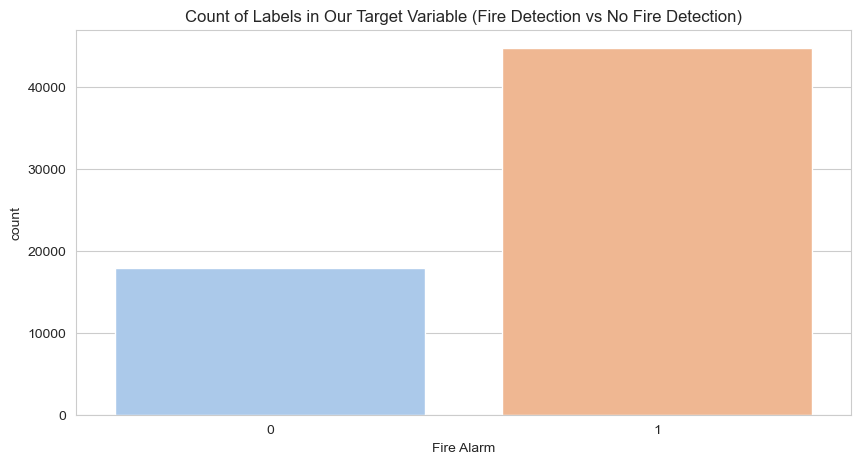

In [5]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='Fire Alarm', data=df, palette= 'pastel')
plt.title('Count of Labels in Our Target Variable (Fire Detection vs No Fire Detection)')

plt.show()
#We can see that the dataset is quite imbalanced. Most instances in our dataset belong to class label 1 meaning the fire alarm
#goes on.

In [6]:
print('Count of Labels In Our Target Variable')
df['Fire Alarm'].value_counts()
#We can see that around 70% of instances have a class label of 1.

Count of Labels In Our Target Variable


1    44757
0    17873
Name: Fire Alarm, dtype: int64

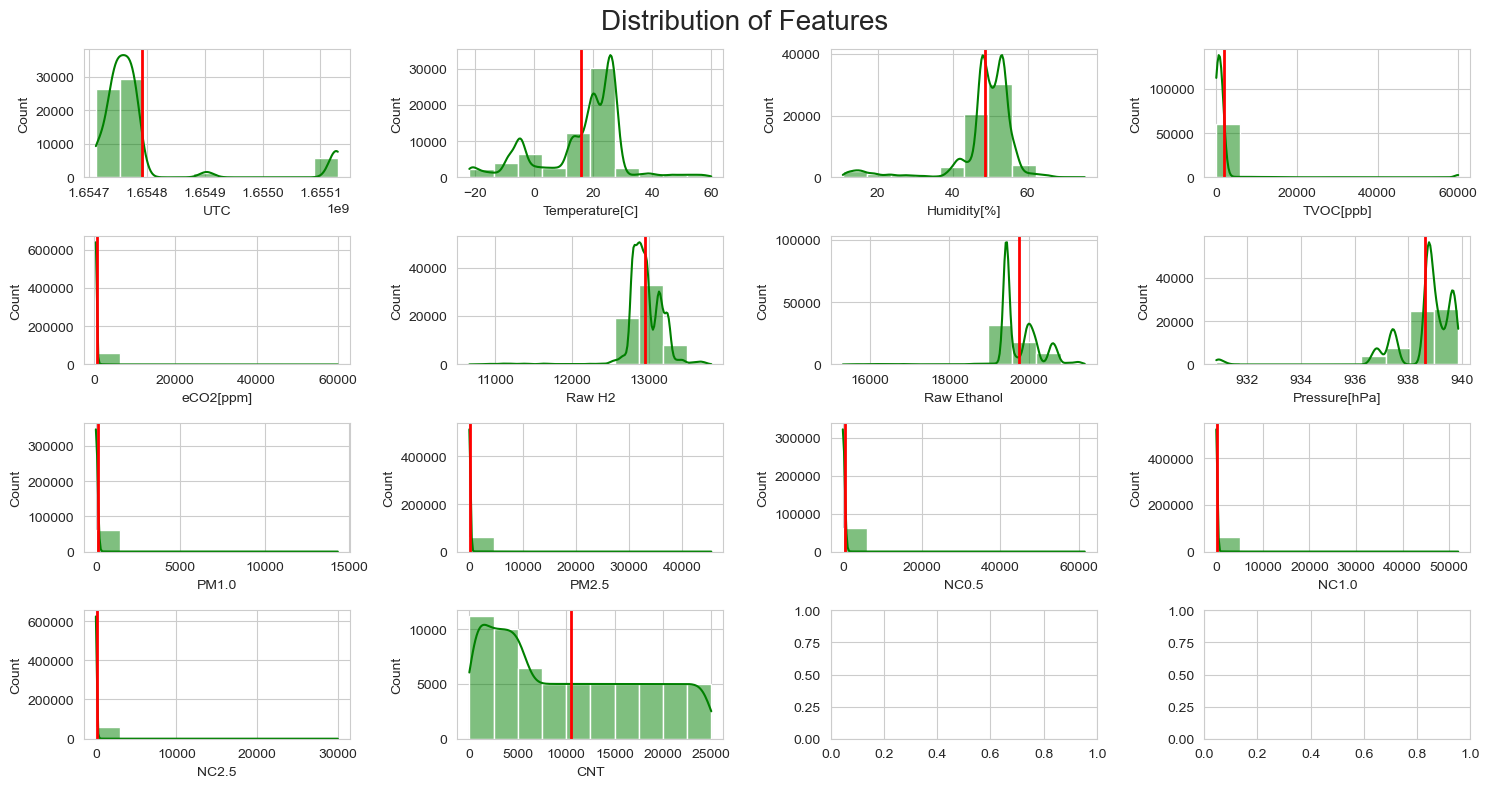

In [7]:
cols = df.columns.tolist()
cols = cols[:-1]
fig, ax = plt.subplots(4,4, figsize=(15,8))
axes_lst = ax.flatten()
for col, sb in zip(cols, axes_lst):
    mean_value = df[col].mean()
    ax = sns.histplot(df[col], bins=10, kde=True, ax=sb, color='green')
    ax.axvline(mean_value, color='red', linewidth=2)
fig.suptitle('Distribution of Features', fontsize=20)
plt.tight_layout()

plt.show()
#The observation we can make from these graphs are that some of the variables follow a normal distribution which indicates that 
#there may not be any outliers to worry about. At the same time though, we can see that most variables highly skewed. This 
#indicates potential outliers that may influence the further predictions.
#We can also notice that the range of values is different across multiple columns. This indicates that the data should be 
#scaled/normalized.

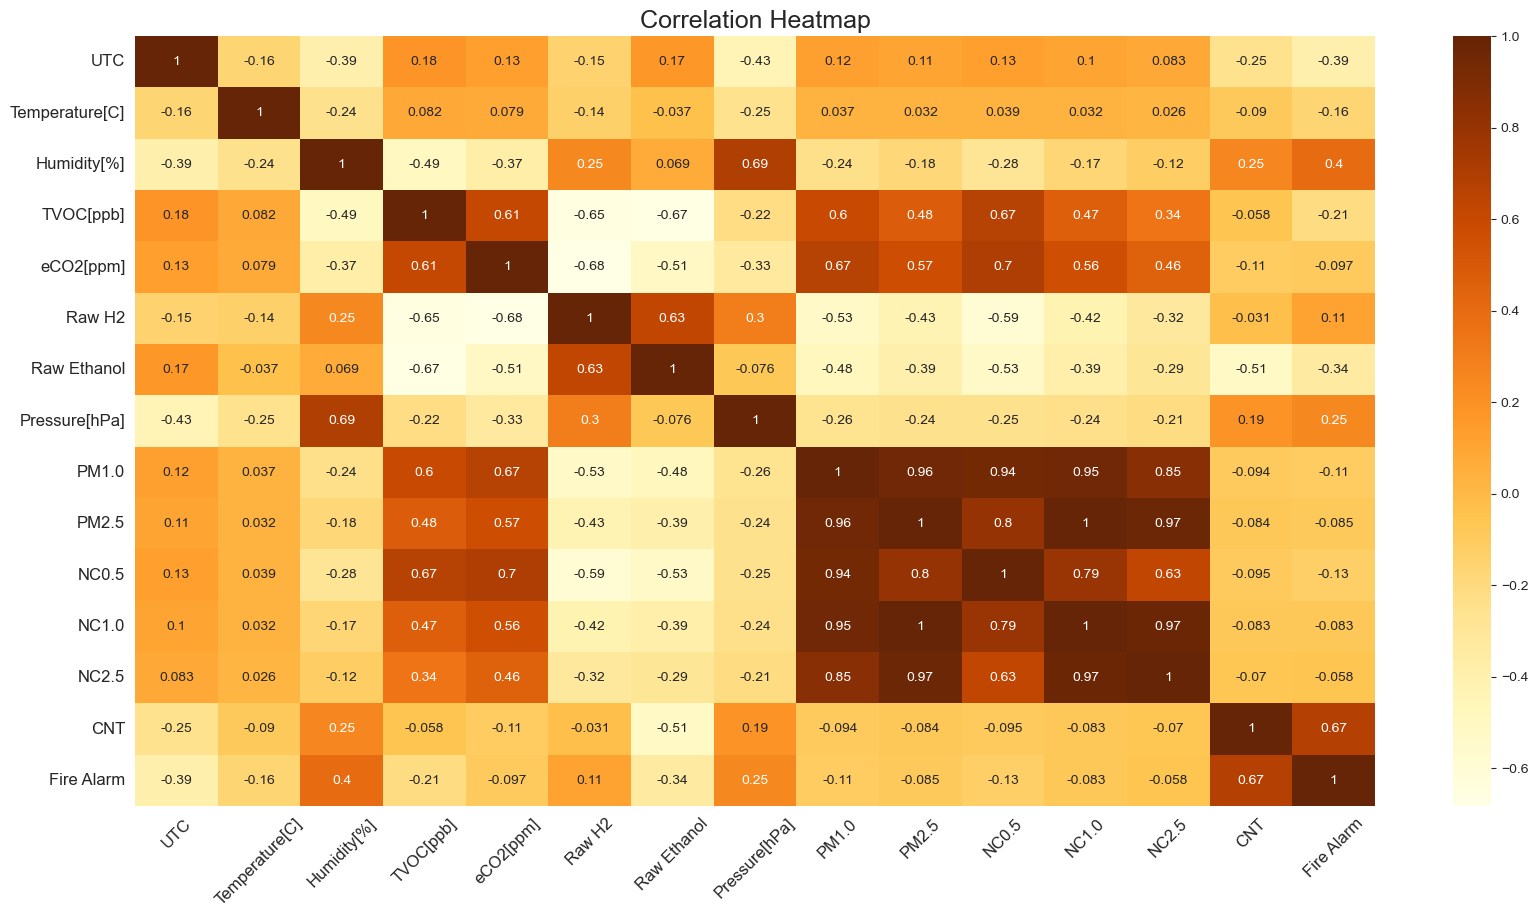

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap = 'YlOrBr')
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.title('Correlation Heatmap',fontsize=18)

plt.show()
#We can see that in general the correlations are quite low between the independent variables and our target variable (Class).
#But we can see some variables having correlation with our target variable. This will help us choose the optimal number of 
#input variables to choose for our neural network.

# Data PreProcessing

## Checking for Duplicate Rows

In [9]:
duplicate_rows = df.duplicated()
print(f'In the dataset there are a total of {duplicate_rows.sum()} duplicate rows')
#We don't have to worry about duplicate rows.

In the dataset there are a total of 0 duplicate rows


## Encoding Our Tagret Variable

In [10]:
from sklearn.preprocessing import LabelEncoder
encoding_label = LabelEncoder()
df['Fire Alarm'] = encoding_label.fit_transform(df['Fire Alarm'])
df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


## Scaling/Normalizing the Data

In [11]:
#From the EDA above, we noticed that the range of values is different accross multiple columns in our dataset. So scaling our
#data is necessary.
print('Range of Values Before Scaling/Normalizing the Data:\n\n')
for column in df.columns.tolist():
    min_value = df[column].min()
    max_value = df[column].max()
    print(f'Column {column}: Min Value={min_value}, Max Value={max_value}\n')
    
#We make a copy of the dataframe.
df_scaled = df.copy()

# 
#We drop the columns 'UTC' and 'CNT' as this is a timestep, which shows a high correlation with the target variable, because the
#cases of fire are grouped at the end of the dataset. So the target variable would correlate with a higher timestamp, without
#necessarily having anything to do with a fire event.
df_scaled = df_scaled.drop(['UTC','CNT'],axis=1)

#As we mentioned, the range of values is different so we should scale our data. So we scale all values to have a min value of 0 
#and max value of 1, except the target variable which is already binary with values either 0 or 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled.iloc[:, :-1] = scaler.fit_transform(df_scaled.iloc[:, :-1])
#We now show the range of values after normalizing the data.
print('*'*100)
print('Range of Values After Scaling/Normalizing the Data:\n\n')
for column in df_scaled.columns.tolist():
    min_value = df_scaled[column].min()
    max_value = df_scaled[column].max()
    print(f'Column {column}: Min Value={min_value}, Max Value={max_value}\n')
    
    
#Reference link for MinMaxScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Range of Values Before Scaling/Normalizing the Data:


Column UTC: Min Value=1654712187, Max Value=1655130051

Column Temperature[C]: Min Value=-22.01, Max Value=59.93

Column Humidity[%]: Min Value=10.74, Max Value=75.2

Column TVOC[ppb]: Min Value=0, Max Value=60000

Column eCO2[ppm]: Min Value=400, Max Value=60000

Column Raw H2: Min Value=10668, Max Value=13803

Column Raw Ethanol: Min Value=15317, Max Value=21410

Column Pressure[hPa]: Min Value=930.852, Max Value=939.861

Column PM1.0: Min Value=0.0, Max Value=14333.69

Column PM2.5: Min Value=0.0, Max Value=45432.26

Column NC0.5: Min Value=0.0, Max Value=61482.03

Column NC1.0: Min Value=0.0, Max Value=51914.68

Column NC2.5: Min Value=0.0, Max Value=30026.438

Column CNT: Min Value=0, Max Value=24993

Column Fire Alarm: Min Value=0, Max Value=1

****************************************************************************************************
Range of Values After Scaling/Normalizing the Data:


Column Temperature[C]: Min Va

In [12]:
df_scaled.head()
#We can see now that the range of values for the whole dataset is the same.

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,0.512692,0.723239,0.0,0.0,0.522488,0.525685,0.986014,0.0,0.0,0.0,0.0,0.0,0
1,0.512875,0.712535,0.0,0.0,0.534928,0.547185,0.987013,0.0,0.0,0.0,0.0,0.0,0
2,0.513046,0.701520,0.0,0.0,0.544179,0.565731,0.986347,0.0,0.0,0.0,0.0,0.0,0
3,0.513229,0.690971,0.0,0.0,0.549282,0.579682,0.986125,0.0,0.0,0.0,0.0,0.0,0
4,0.513412,0.681818,0.0,0.0,0.553429,0.591498,0.987013,0.0,0.0,0.0,0.0,0.0,0


## Significance Testing and Feature Selection

In [13]:
#We are going to check the significance of the correlations between the variables that show the highest correlation with our 
#target variable. If the correlation between the independent variables and our dependent variable are significant, we will use 
#those for our model. #We will use the pearson correlation to check the significance of the correlation between the target 
#variable and all of the independent variables that it seems to have a higher correlation with. P-value=0.05 will be our 
#threshold for our statistical hypothesis tesing. Any P-value below 0.05 means that our variable has an effect on our target 
#variable. 

#Reference link for pearson and spearman correlations: https://realpython.com/numpy-scipy-pandas-correlation-python/

In [14]:
from scipy.stats import pearsonr , spearmanr
pearson_corr, p_value_pe = pearsonr(df_scaled['Humidity[%]'] , df_scaled['Fire Alarm'])

print(f"The pearson correlation between the 'humidity[%]' and 'Fire Alarm' columns is: {pearson_corr}")
print(f"The statistical significance (p-value) between the columns is: {p_value_pe}")

The pearson correlation between the 'humidity[%]' and 'Fire Alarm' columns is: 0.3998463739004312
The statistical significance (p-value) between the columns is: 0.0


In [15]:
from scipy.stats import pearsonr , spearmanr
pearson_corr, p_value_pe = pearsonr(df_scaled['eCO2[ppm]'] , df_scaled['Fire Alarm'])

print(f"The pearson correlation between the 'humidity[%]' and 'Fire Alarm' columns is: {pearson_corr}")
print(f"The statistical significance (p-value) between the columns is: {p_value_pe}")

The pearson correlation between the 'humidity[%]' and 'Fire Alarm' columns is: -0.09700610890253561
The statistical significance (p-value) between the columns is: 8.635878163070674e-131


In [16]:
from scipy.stats import pearsonr , spearmanr
pearson_corr, p_value_pe = pearsonr(df_scaled['TVOC[ppb]'] , df_scaled['Fire Alarm'])

print(f"The pearson correlation between the 'TVOC[ppb]' and 'Fire Alarm' columns is: {pearson_corr}")
print(f"The statistical significance (p-value) between the columns is: {p_value_pe}")

The pearson correlation between the 'TVOC[ppb]' and 'Fire Alarm' columns is: -0.21474344468025636
The statistical significance (p-value) between the columns is: 0.0


In [17]:
from scipy.stats import pearsonr , spearmanr
pearson_corr, p_value_pe = pearsonr(df_scaled['Raw Ethanol'] , df_scaled['Fire Alarm'])

print(f"The pearson correlation between the 'Raw Ethanol' and 'Fire Alarm' columns is: {pearson_corr}")
print(f"The statistical significance (p-value) between the columns is: {p_value_pe}")

The pearson correlation between the 'Raw Ethanol' and 'Fire Alarm' columns is: -0.3406518454455588
The statistical significance (p-value) between the columns is: 0.0


In [18]:
from scipy.stats import pearsonr , spearmanr
pearson_corr, p_value_pe = pearsonr(df_scaled['Pressure[hPa]'] , df_scaled['Fire Alarm'])

print(f"The pearson correlation between the 'Pressure[hPa]' and 'Fire Alarm' columns is: {pearson_corr}")
print(f"The statistical significance (p-value) between the columns is: {p_value_pe}")

The pearson correlation between the 'Pressure[hPa]' and 'Fire Alarm' columns is: 0.2497969278808065
The statistical significance (p-value) between the columns is: 0.0


In [19]:
from scipy.stats import pearsonr , spearmanr
pearson_corr, p_value_pe = pearsonr(df_scaled['PM1.0'] , df_scaled['Fire Alarm'])

print(f"The pearson correlation between the 'PMI.0' and 'Fire Alarm' columns is: {pearson_corr}")
print(f"The statistical significance (p-value) between the columns is: {p_value_pe}")

The pearson correlation between the 'PMI.0' and 'Fire Alarm' columns is: -0.11055190457734197
The statistical significance (p-value) between the columns is: 1.683047832239299e-169


In [20]:
from scipy.stats import pearsonr , spearmanr
pearson_corr, p_value_pe = pearsonr(df_scaled['Temperature[C]'] , df_scaled['Fire Alarm'])

print(f"The pearson correlation between the 'Temperature[C]' and 'Fire Alarm' columns is: {pearson_corr}")
print(f"The statistical significance (p-value) between the columns is: {p_value_pe}")

The pearson correlation between the 'Temperature[C]' and 'Fire Alarm' columns is: -0.1639019096348327
The statistical significance (p-value) between the columns is: 0.0


In [21]:
#All of the variables that we want to use for our NECO methods seem to have a statistically significant correlations with our 
#target variables with p-values<0.05. We only want to use the values from these columns, which have a statistically 
#significant correlation with our target variable so we don't overcomplicate things.

## Handling Imbalanced Dataset: Applying SMOTE 
## Splitting the Dataset into Train, Validation and Test Sets

In [22]:
#As we mentioned, the dataset is imbalanced. About 70% of values belong to class 1 for our target variable and 30% belong to 
#class 0. To address this problem, we are going to apply smote to our dataset which is a technique to oversample the minority 
#class (in our case class 0). This is a type of data augmentation where new example of the minority class can be synthesized 
#from the existing ones. 

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim

#We split the dataset first into X and y variables.
X=df_scaled.iloc[:,[0,1,2,3,5,6,7]].values #We select only the 7 independent variables that showed high correlation with our
#target variable.
y = df.iloc[:,-1].values

X_Train, X_Test_Val, Y_Train, Y_Test_Val = train_test_split(X,y, test_size=0.2, random_state=40)
#We first split the dataset to a training and test set using a train/test_validation split of 0.2 meaning that 80% of our data 
#will be used to train our model and 20% will be used to validate and test it. We use a certain random state (40) for 
#reproducibility.

X_Test, X_Val, Y_Test, Y_Val = train_test_split(X_Test_Val, Y_Test_Val, test_size=0.5, random_state=40)
#We further split the test dataset to a validation set and a test set. From the test set created above, 50% of the data will go
#to the validation set which will be used to tune the hyperparameters and find the optimal ones that maximize model performance.

smote = SMOTE(random_state=40)
X_Train_Smote, Y_Train_Smote = smote.fit_resample(X_Train, Y_Train)
#We apply SMOTE to the training data so we have an equal amount of instances for both target labels.

#We convert the arrays to PyTorch tensors to feed to the model later on
X_Train_Tensor = torch.tensor(X_Train_Smote, dtype=torch.float32)
X_Val_Tensor = torch.tensor(X_Val, dtype=torch.float32)
X_Test_Tensor = torch.tensor(X_Test, dtype = torch.float32)

Y_Train_Tensor = torch.tensor(Y_Train_Smote, dtype = torch.float32)
Y_Val_Tensor = torch.tensor(Y_Val, dtype=torch.float32)
Y_Test_Tensor = torch.tensor(Y_Test, dtype=torch.float32)

#Reference Link for train_test_split: https://builtin.com/data-science/train-test-split
#Reference Link for SMOTE: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

## Saving the train, validation and test sets

In [83]:
X_Test_Numpy = X_Test_Tensor.numpy()
Y_Test_Numpy = Y_Test_Tensor.numpy()

X_Test_df = pd.DataFrame(X_Test_Numpy)
Y_Test_df = pd.DataFrame(Y_Test_Numpy)

X_Test_df.to_csv('X_Test.csv', index=False)
Y_Test_df.to_csv('Y_Test.csv', index=False)

#We save the X and Y test sets into csv files to then load to a different notebook.

In [84]:
X_Val_Numpy = X_Val_Tensor.numpy()
Y_Val_Numpy = Y_Val_Tensor.numpy()
X_Train_Numpy = X_Train_Tensor.numpy()
Y_Train_Numpy = Y_Train_Tensor.numpy()

X_Val_df = pd.DataFrame(X_Val_Numpy)
Y_Val_df = pd.DataFrame(Y_Val_Numpy)
X_Train_df = pd.DataFrame(X_Train_Numpy)
Y_Train_df = pd.DataFrame(Y_Train_Numpy)

X_Val_df.to_csv('X_Val.csv', index=False)
Y_Val_df.to_csv('Y_Val.csv', index=False)
X_Train_df.to_csv('X_Train.csv', index=False)
Y_Train_df.to_csv('Y_Train.csv', index=False)

##We save the X and Y validation and train sets into csv files to then load to a different notebook.

# Creating the Neural Network - 1. Multilayer Perceptron

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class FireAlarmNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size): #We set three parameters for our neural network class. The input 
        #size, the number of hidden neurons and the output size.
        super(FireAlarmNN, self).__init__()
        self.f_c_1 = nn.Linear(input_size, hidden_sizes[0], bias=True) #This is the first fully connected layer. We pass the input
        #features to the first hidden layer. We also include a bias term for each neuron in the hidden layer.
        self.f_c_2 = nn.Linear(hidden_sizes[0], hidden_sizes[1], bias=True) #This is the second fully connected layer. We pass
        #the features from the first hidden layer to the second one and include a bias term for each neuron in the hidden layer.
        self.f_c_3 = nn.Linear(hidden_sizes[1], hidden_sizes[2], bias=True) #This is the third fully connected layer. We pass the
        #features from the second hidden layer to the third hidden layer and inlcude a bias term for each neuron in the hidden
        #layer.
        self.f_c_4 = nn.Linear(hidden_sizes[2], output_size, bias=True) #This is the fourth fully connceted layer. We pass the 
        #features from the third hidden layer to the output layer and incude a bias term for the single neuron in the output 
        #layer.
        self.relu = nn.ReLU() #This is the rectified linear unit activation function. The recitified linear unit activation
        #is a calculation that returns the value 0 if the input value is 0 or less and then for the positive values and returns
        #the input value itself if the input value is positive.

    def forward(self, x): #This is the function that shows the forward propagation of the MLP neural network.
        x = self.f_c_1(x)
        x = self.relu(x)
        x = self.f_c_2(x)
        x = self.relu(x)
        x = self.f_c_3(x)
        x = self.relu(x)
        output = self.f_c_4(x)
        return output
        #We pass the input features through the first fully connected layer and activate the relu activation function in each 
        #forward pass. Then the output of the first fully connected layer becomes the input of the next fully connected layer 
        #etc. After each forward pass we activate the relu function.

    def fit_training_validating(self, train_input_data, train_targets, val_input_data, val_targets, learning_rate, epochs, momentum, weight_decay, patience):
        #This is the part of the neural network which is used to train and validate the model on the given input data and 
        #targets. It applies weight decay for regularization, momentum for optimization and acceleration of the convergence of 
        #gradient descent and early stopping by tracking the validation loss to prevent early stopping during training.
        criterion = nn.BCEWithLogitsLoss() #This is the loss function. We select binary cross-entropy with logits loss since we
        #are dealing with a binary classification problem.
        optimizer = optim.Adam(self.parameters(), lr=learning_rate, weight_decay=weight_decay) #This is the optimizer that will 
        #update the weights and biases based on the loss function. The adam optimizer is a popular choice for binary 
        #classification problems. We also specify the learning rate, momentum terms (betas) and weight decay for regularization.
        highest_val_loss = float('inf')
        early_stopping_count = 0
        train_losses = [] #We track the training loss for each epoch.
        val_losses = [] #We track the validation loss for each epoch.

        for epoch in range(epochs):
            self.train()  #We first enter training mode.
            predictions = self(train_input_data) #we make predictions on the training set to track the loss.
            loss = criterion(predictions, train_targets.view(-1, 1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item()) #This is the training process of the neural network. For every epoch we feed the inputs forward through the layers,
            #we get the predictions, we calculate the loss function, we then perform backpropagation to get the gradients and
            #then update the weights and biases with the adam function.

            self.eval()  #We enter validation mode and stop training mode.
            with torch.no_grad():
                val_predictions = self(val_input_data)  #We make predictions on the validation set for every epoch.
                val_loss = criterion(val_predictions, val_targets.view(-1, 1))  #We calculate the validation loss.
                val_losses.append(val_loss.item()) #We store every validation loss in the list we created above.
                 

            if val_loss.item() < highest_val_loss:
                highest_val_loss = val_loss.item()
                early_stopping_count = 0
            else:
                early_stopping_count +=1

            if early_stopping_count > patience:
                print(f'Early Stopping at Epoch {epoch}')
                break

        return train_losses, val_losses
    #In the above code we implement the early stopping criteria. If the validation loss keeps increasing over 10 epochs
    #(patience=10) then we stop training because we are overfitting to the training data.

    def predicting(self, X): #This function will be applied on the validation and test set to see how well the model is able to 
        #predict. We will track down the validation accuracies for each model we validate and then calculate the accuracy of the
        #best model with the test set.
        self.eval()  #We enter validation mode.
        with torch.no_grad():
            predictions = self(X)
            final_predictions = torch.sigmoid(predictions) #When the forward propagation is complete, we apply the sigmoid
            #activation function. This transforms the numbers into probabilities of belonging either in class 0 or 1.
            return (final_predictions >= 0.5).int() #We set the threshold to 0.5 . This means that the probabilities that 
        #are equal or over 0.5 are more likely to belong to class 1 and the probabilities that are lower than 0.5 are more 
        #likely to belong to class 0. By calling the .int() we transform the probabilities that are over or equal to 0.5 to 1,
        #and the probabilities under 0.5 to 0.
        
        
#Reference link for BCEWithLogitsLoss() function: https://pytorch.org/docs/stable/generated/torch.nn.functional.binary_cross_entropy_with_logits.html
#Reference link for Adam optimizer: https://www.analyticsvidhya.com/blog/2023/09/what-is-adam-optimizer/#:~:text=The%20Adam%20optimizer%2C%20short%20for,Developed%20by%20Diederik%20P.
#Reference link for Sigmoid function: https://www.analyticsvidhya.com/blog/2023/01/why-is-sigmoid-function-important-in-artificial-neural-networks/
#Reference link for Early Stopping: https://stackoverflow.com/questions/71998978/early-stopping-in-pytorch
#Reference link for Early Stopping: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

# Specifying the parameters and hyperparameters that we are going to test

In [24]:
input_size = 7 #Our input size is 7, which corresponds to the number of features we will use to feed the model.
learning_rates = [0.001, 0.01, 0.05, 0.1, 1] #We try different learning rates so we don't overshoot the combination of weights
#that minimize the error loss.
hidden_layer_sizes = [[5,3,2], [10,5,3], [20,10,5], [30,15,7]] #We will try out our model with these numbers of neurons 
#in the three hidden layer.
momentum = 0.9 #We set a high value for momentum for fast convergence.
weight_decay = 0.0001 #We set a small value for weight decay to prevent overfitting.
patience = 10 #If the validation loss is higher for 10 epochs, we stop training.
epochs = 2000 #Max epochs, with early stopping implemented with a patience of 10.

In [25]:
#We initialize variables to track the best performance and store the accuracy, hyperparameters and training and validation
#losses over each epoch of the best model.
optimal_accuracy = 0
optimal_hyperparameters = {}
optimal_losses = {}

# Training the model and validating it to tune the hyperparameters and find the optimal ones

In [26]:
torch.manual_seed(100)
import time #This is going to be used for tracking the training time of all models.
from sklearn.metrics import accuracy_score
total_training_time = 0 #This variable will be used to count the total training time for all models combined.

#This is the training and validation loop.
for lr in learning_rates: #For every different learning rate.
    for hs in hidden_layer_sizes: #For every different hidden size combination for our 3 hidden layers.
        start_time = time.time() #This is the start of training time for each model.
        model = FireAlarmNN(input_size=input_size, hidden_sizes=hs, output_size=1)
        training_losses, validation_losses = model.fit_training_validating(X_Train_Tensor, Y_Train_Tensor, X_Val_Tensor,
                                                                          Y_Val_Tensor, lr, epochs, momentum, weight_decay, 
                                                                           patience) 
        #We start training the model with the parameters and hyperparameters we specified
        end_time = time.time() #This is the end of training time for each model.
        training_time = end_time - start_time #We calculate the training time for each hyperparameter combination.
        training_time = round(training_time,2)
        total_training_time += training_time #We add it to the total training time to calculate the total training time of all
        #hyperparameter combinations
        val_predictions = model.predicting(X_Val_Tensor)
        val_accuracy = accuracy_score(Y_Val_Tensor.numpy(), val_predictions.numpy())
        print(f"Learning Rate: {lr}, Hidden Neuron Size: {hs}, Number of Epochs: {len(training_losses)-1}, "
              f"Accuracy: {val_accuracy}, Training Time (sec): {training_time:.2f}\n")
        #We use the predicting function of the FireAlarmNN class to calculate the accuracy for each model.
        
        if val_accuracy > optimal_accuracy:
            optimal_accuracy = val_accuracy
            optimal_speed = training_time
            optimal_hyperparameters = {'learning_rate': lr, 'hidden_sizes': hs, 'epochs': len(training_losses)-1,
                                      'Training Time (sec)': optimal_speed}
            #'epochs': len(training_losses)-1 --> Number of epochs the model actually trained for.
            optimal_losses = {'training_losses': training_losses, 'validation_losses': validation_losses}
            #We store the hyperparameters that generated the highest accuracy on the validation set.

#We print the best hyperparameters and performance.            
print("\nBest Parameters:", optimal_hyperparameters)
print("Best Accuracy:", optimal_accuracy)
print('Total Training Time (sec) (for all hyperparameter combinations):', round(total_training_time,2))

Early Stopping at Epoch 11
Learning Rate: 0.001, Hidden Neuron Size: [5, 3, 2], Number of Epochs: 11, Accuracy: 0.6894459524189686, Training Time (sec): 3.57

Early Stopping at Epoch 11
Learning Rate: 0.001, Hidden Neuron Size: [10, 5, 3], Number of Epochs: 11, Accuracy: 0.7137154718186173, Training Time (sec): 0.29

Early Stopping at Epoch 1417
Learning Rate: 0.001, Hidden Neuron Size: [20, 10, 5], Number of Epochs: 1417, Accuracy: 0.9458725850231519, Training Time (sec): 43.86

Early Stopping at Epoch 11
Learning Rate: 0.001, Hidden Neuron Size: [30, 15, 7], Number of Epochs: 11, Accuracy: 0.7137154718186173, Training Time (sec): 0.64

Early Stopping at Epoch 42
Learning Rate: 0.01, Hidden Neuron Size: [5, 3, 2], Number of Epochs: 42, Accuracy: 0.8013731438607696, Training Time (sec): 0.85

Early Stopping at Epoch 168
Learning Rate: 0.01, Hidden Neuron Size: [10, 5, 3], Number of Epochs: 168, Accuracy: 0.8882324764489861, Training Time (sec): 4.34

Early Stopping at Epoch 11
Learning

# Storing the Optimal Hyperparameters

In [27]:
optimal_sizes = optimal_hyperparameters['hidden_sizes']
optimal_lr = optimal_hyperparameters['learning_rate']
optimal_epochs = optimal_hyperparameters['epochs']
#We store the optimal hyperparameters into variables to use for testing the best model on the test set.

# Testing the best model to new, unseen data

In [28]:
#Generate predictions on the test set with the trained model.
torch.manual_seed(100) #For reproducibility.

best_model = FireAlarmNN(input_size=input_size,hidden_sizes=optimal_sizes,output_size=1) #We set the input size equal to 7, which 
#corresponds to the input features we selected to use to predict the target labels. The output size is 1, as we are trying to 
#solve a binary classification problem and predict a label either 0 or 1.

training_losses, validation_losses = best_model.fit_training_validating(X_Train_Tensor,Y_Train_Tensor, X_Val_Tensor, Y_Val_Tensor,optimal_lr,optimal_epochs,momentum,weight_decay,patience) 
#We train and validate the model with the best hyperparameters.
test_predictions = best_model.predicting(X_Test_Tensor)
test_accuracy = accuracy_score(Y_Test_Tensor.numpy(), test_predictions.numpy())
#We test the optimal model on the test set and generate the accuracy score.

In [29]:
best_model
#These are the hyperparameters and activation function of the best MLP model.

FireAlarmNN(
  (f_c_1): Linear(in_features=7, out_features=30, bias=True)
  (f_c_2): Linear(in_features=30, out_features=15, bias=True)
  (f_c_3): Linear(in_features=15, out_features=7, bias=True)
  (f_c_4): Linear(in_features=7, out_features=1, bias=True)
  (relu): ReLU()
)

# Saving the best MLP model

In [92]:
import pickle

with open('/Desktop/Masters/Neural Networks/Individual Coursework/Data & Coding/Best_MLP_Model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
#We save the file of the best MLP model in the path we want as as a pickle file.

#Reference link for pickle files: https://www.tutorialspoint.com/how-to-use-pickle-to-save-and-load-variables-in-python

In [93]:
import os

path_to_save = '/Desktop/Masters/Neural Networks/Individual Coursework/Data & Coding/Best_MLP_Model.pth'

os.makedirs(path_to_save, exist_ok=True)

torch.save(best_model.state_dict(), os.path.join(path_to_save, 'Best_MLP_Model.pth'))
#We save the file of the best MLP model in the path we want as as a pth file.

#Reference link for pth files: https://pytorch.org/tutorials/beginner/saving_loading_models.html

# Creating a Confusion Matrix for the Test Set

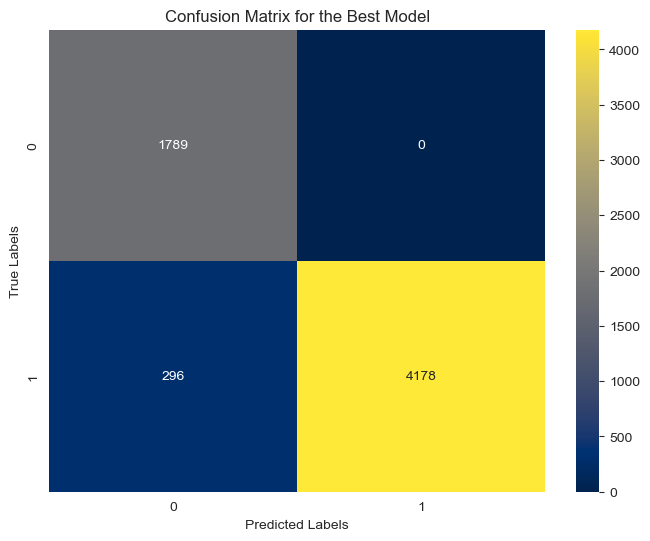

True Negatives: 1789
False Positives: 0
False Negatives: 296
True Positives: 4178
****************************************************************************************************
The test accuracy is 0.9527383043269998
The test precision is 1.0
The test recall is 0.9338399642378185
The test f1-score is 0.965788257050393


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
#We create a confusion matrix to see how many times the model detected smoke and predicted a correct fire alarm (true positives)
#or how many times our model did not detect smoke and predicted a false fire alarm correctly (true negatives).

plt.figure(figsize=(8,6))
conf_matrix = confusion_matrix(Y_Test_Tensor.numpy(), test_predictions.numpy())
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for the Best Model')
plt.show()

t_n, f_p, f_n, t_p = conf_matrix.ravel()
test_precision = precision_score(Y_Test_Tensor.numpy(), test_predictions.numpy())
test_recall = recall_score(Y_Test_Tensor.numpy(), test_predictions.numpy())
test_f1_score = f1_score(Y_Test_Tensor.numpy(), test_predictions.numpy())

#We print out the main metrics.
print(f"True Negatives: {t_n}")
print(f"False Positives: {f_p}")
print(f"False Negatives: {f_n}")
print(f"True Positives: {t_p}")
print('*' * 100)
print(f'The test accuracy is {test_accuracy}')
print(f'The test precision is {test_precision}')
print(f'The test recall is {test_recall}')
print(f'The test f1-score is {test_f1_score}')
#We also want to calculate other metrics such as precision, recall and f1-score to have a better understanding of the strenghts
#and weaknesses of our model in specific areas of performance.

#Reference link for confusion matrix: https://proclusacademy.com/blog/practical/confusion-matrix-accuracy-sklearn-seaborn/

# Plotting Train vs Validation Losses Over Time

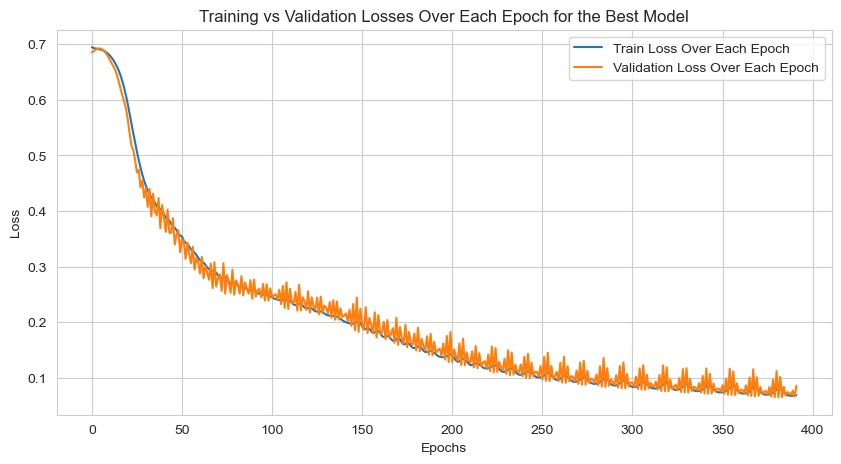

In [31]:
plt.figure(figsize=(10,5)) #We display the training and validation losses over the epochs to compare them.
plt.plot(training_losses, label = 'Train Loss Over Each Epoch')
plt.plot(validation_losses, label = 'Validation Loss Over Each Epoch')
plt.title('Training vs Validation Losses Over Each Epoch for the Best Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
#We plot out the training and validation losses over each epoch to see if the early stopping was accurate. If the validation
#loss stops going down after a few epochs then that indicates that the model is starting to overfit to out training data. This
#is why we applied early stopping with patience equal to 10.

# Plotting the ROC Curve for the Test Set 

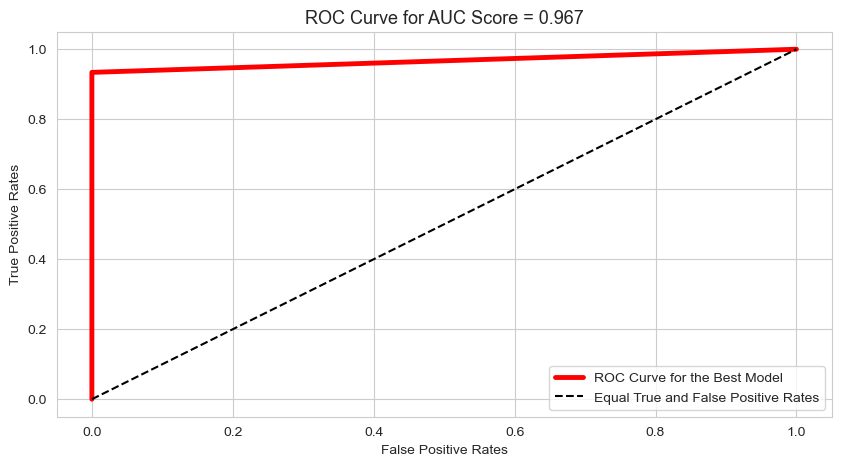

In [32]:
from sklearn.metrics import roc_curve, auc #We will also use an ROC curve to see the true positive and false positive rates.
false_positive_rates, true_positive_rates, thresholds = roc_curve(Y_Test, test_predictions) #We calculate the false and true 
#positive rates.
AUC_Score = auc(false_positive_rates, true_positive_rates) #We calculate the AUC score.

plt.figure(figsize=(10,5))
plt.plot(false_positive_rates, true_positive_rates, color='red', lw=3.5, label=f'ROC Curve for the Best Model')
plt.plot([0,1], [0,1], color='black', lw=1.5, linestyle='--', label='Equal True and False Positive Rates')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title(f'ROC Curve for AUC Score = {round(AUC_Score,3)}', fontsize=13)
plt.legend(loc='lower right')

plt.show()
#We display the ROC Curve for the best model to compare the true and false positive rates. We want to see the trade-offs between
#the true and false positive rates.

#Reference link for ROC Curve: https://www.w3schools.com/python/python_ml_auc_roc.asp

# Creating the Neural Network - 2. Support Vector Machines (SVM)

In [33]:
from sklearn.svm import SVC #From sklearn we import the SVC which is part of Support Vector Machines and it is used for.
#classification problems.
from sklearn.metrics import accuracy_score

#Reference Link for SVC: https://randomresearchai.medium.com/svc-model-in-python-2d7b6d9434b4
#Reference link for SVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Specifying the parameters and hyperparameters that we are going to test

In [34]:
C_Values = [0.1,1,10,100] #This is a list of all possible C parameters of the SVM models. The C parameter controls the trade-off
#between a smooth decision boundary and classifying the training points correctly. We select both small and larger values for
#the C parameter because a small C parameter creates a smoother decision boundary with more misclassifications on the training
#set data but we also want to check higher C parameters since larger values aim for higher accuracies but with the risk of
#overfitting.
Gamma_Values = [0.01, 0.1] #This is a list of all possible gamma values of the non-linear SVM. We will also try different 
#gamma values because we want to compare the performance of linear vs non-linear SVMs. The gamma value is influenced by the 
#distribution of the training data and we use both a smaller and larger value because smaller values imply far-reaching 
#influence, while larger values are limited by the influence of close neighbors. 
Optimal_Val_Accuracy = 0 #We want to keep track of the model with the highest accuracy among different models with different
#hyperparameters.
Optimal_SVM_Mdl = None #We want to save the model.
Optimal_Parameters = {'C': None, 'gamma': None, 'kernel': None} #We want to keep track of the parameters for our best model.

# Training the model and validating it to tune the hyperparameters and find the optimal ones

In [35]:
import time
torch.manual_seed(100) #For reproducibility.
Total_Start_Time = time.time() #This is the start of training and validation time. This will be used to calculate the total 
#training and validation time for all models with different hyperparameter combinations combined.

for C in C_Values: #For all different c values.
    for kernel in ['linear', 'rbf']: #For differen kernels (linear and non-linear SVMs ('rbf' kernel for non-linear)).
        if kernel == 'linear': #We first train and validate the linear kernels.
            start_time = time.time() #This is the start of training time for the particular linear model.
            svm_clf_mdl = SVC(kernel=kernel, C=C) #We create the SVM model with the hyperparameters specified.
            svm_clf_mdl.fit(X_Train_Tensor, Y_Train_Tensor) #We fit the model to the train set so we can train it.
            end_time = time.time() #This is the end of training time for the particular linear model.
            Val_Accuracy = accuracy_score(Y_Val_Tensor, svm_clf_mdl.predict(X_Val_Tensor)) #We now use the validation set to 
            #calculate the accuracy.
            print(f'Validation Accuracy With C={C}, kernel={kernel}: {Val_Accuracy}')
            print(f'Training Time for C={C}, kernel={kernel}: {(end_time - start_time)/60:.2f} Minutes\n')
            #We print out the accuracy of each model and the training time.
            
            if Val_Accuracy > Optimal_Val_Accuracy: 
                Optimal_Val_Accuracy = Val_Accuracy
                Optimal_SVM_Mdl = svm_clf_mdl
                Optimal_Parameters = {'C': C, 'kernel': kernel}
                #If the validation accuracy is better than the current best validation accuracy, it is the new best validation
                #accuracy.
                
        else: #Now we train and validate the non-linear kernels.
            for gamma in Gamma_Values: #For different gamma values.
                start_time = time.time() #This is the start of training time for the particular non-linear model.
                svm_clf_mdl = SVC(kernel=kernel, C=C, gamma=gamma) #We create the SVM model with the hyperparameters specified.
                svm_clf_mdl.fit(X_Train_Tensor, Y_Train_Tensor) #We fit the model to the train set so we can train it.
                end_time = time.time() #This is the end of training time for the particular non-linear model.
                Val_Accuracy = accuracy_score(Y_Val_Tensor, svm_clf_mdl.predict(X_Val_Tensor)) #We now use the validation set to
                #calculate the accuracy.
                print(f'Validation Accuracy with C={C}, gamma={gamma}, kernel={kernel}: {Val_Accuracy}')
                print(f'Training Time for C={C}, gamma={gamma}, kernel={kernel}: {(end_time - start_time)/60:.2f} Minutes\n')
                #We print out the accuracy of each model and the training time.
                
            if Val_Accuracy > Optimal_Val_Accuracy: 
                Optimal_Val_Accuracy = Val_Accuracy
                Optimal_SVM_Mdl = svm_clf_mdl
                Optimal_Parameters = {'C': C, 'gamma': gamma, 'kernel': kernel}
                #If the validation accuracy is better than the current best validation accuracy, it is the new best validation
                #accuracy.
                
print('*'*100)
print("Best Parameters On Validation Set:", Optimal_Parameters)
#We print out the hyperparameters of the best performing model.

Total_End_Time = time.time() #This is the end time for training all of the models with different hyperparameter combinations.
print('*'*100)
print("Total Training Time: {:.2f} Minutes".format((Total_End_Time - Total_Start_Time) / 60))
#We print the total time it took to train and validate all of the models combined.

#Reference Link for SVC: https://randomresearchai.medium.com/svc-model-in-python-2d7b6d9434b4
#Reference link for SVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Validation Accuracy With C=0.1, kernel=linear: 0.8561392304007664
Training Time for C=0.1, kernel=linear: 3.10 Minutes

Validation Accuracy with C=0.1, gamma=0.01, kernel=rbf: 0.8767363883123104
Training Time for C=0.1, gamma=0.01, kernel=rbf: 5.86 Minutes

Validation Accuracy with C=0.1, gamma=0.1, kernel=rbf: 0.8644419607216989
Training Time for C=0.1, gamma=0.1, kernel=rbf: 3.30 Minutes

Validation Accuracy With C=1, kernel=linear: 0.8690723295545266
Training Time for C=1, kernel=linear: 1.56 Minutes

Validation Accuracy with C=1, gamma=0.01, kernel=rbf: 0.8578955771994252
Training Time for C=1, gamma=0.01, kernel=rbf: 3.48 Minutes

Validation Accuracy with C=1, gamma=0.1, kernel=rbf: 0.877375059875459
Training Time for C=1, gamma=0.1, kernel=rbf: 2.63 Minutes

Validation Accuracy With C=10, kernel=linear: 0.8729043589334184
Training Time for C=10, kernel=linear: 1.57 Minutes

Validation Accuracy with C=10, gamma=0.01, kernel=rbf: 0.8697110011176752
Training Time for C=10, gamma=0.0

# Testing the best model to new, unseen data

In [36]:
torch.manual_seed(100) #For reproducibility.
#Since the best model (C=100, gamma=0.1, kernel=rbf) was the last model that was trained and validated in the above code 
#section, we don't need to re-train and re-validate the best model and we can go straight ahead and use the test set to evaluate
#its performance.
Test_Predictions = Optimal_SVM_Mdl.predict(X_Test_Tensor) #We use the best model and the test set to predict the binary values.
Test_Accuracy = accuracy_score(Y_Test_Tensor, Test_Predictions)
print("Test Accuracy With the Best Parameters:", Test_Accuracy)
#We calculate and print the test accuracy.

Test Accuracy With the Best Parameters: 0.8958965352067699


# Saving the best SVM model 

In [101]:
import pickle

with open('/Desktop/Masters/Neural Networks/Individual Coursework/Data & Coding/Best_SVM_Model.pkl', 'wb') as file:
    pickle.dump(Optimal_SVM_Mdl, file)
#We save the file of the best SVM model in the path we want as as a pickle file.

#Reference link for pickle files: https://www.tutorialspoint.com/how-to-use-pickle-to-save-and-load-variables-in-python

# Creating a Confusion Matrix for the Test Set

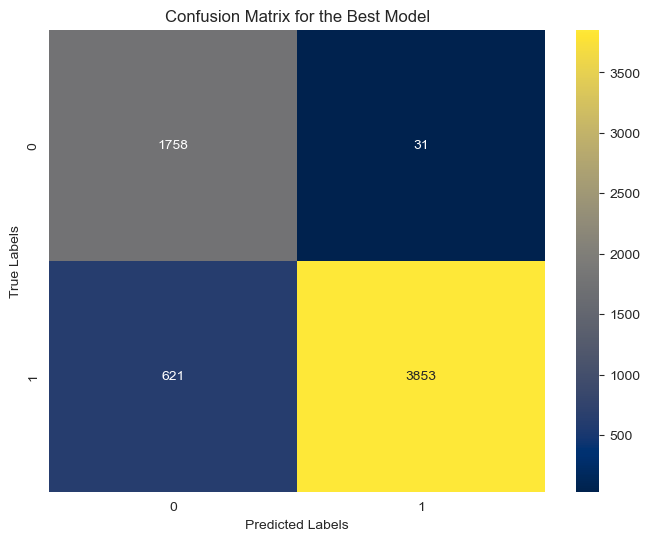

True Negatives: 1758
False Positives: 31
False Negatives: 621
True Positives: 3853
****************************************************************************************************
The test accuracy is 0.8958965352067699
The test precision is 0.9920185375901133
The test recall is 0.8611980330800179
The test f1-score is 0.92199090691553


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

Confusion_Matrix = confusion_matrix(Y_Test_Tensor, Test_Predictions)

plt.figure(figsize=(8,6))
sns.heatmap(Confusion_Matrix, annot=True, fmt='d', cmap='cividis')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for the Best Model')
plt.show()

t_n, f_p, f_n, t_p = Confusion_Matrix.ravel()
Test_Precision = precision_score(Y_Test_Tensor.numpy(), Test_Predictions)
Test_Recall = recall_score(Y_Test_Tensor.numpy(), Test_Predictions)
Test_F1_Score = f1_score(Y_Test_Tensor.numpy(), Test_Predictions)

#We display the matrix 
print(f"True Negatives: {t_n}")
print(f"False Positives: {f_p}")
print(f"False Negatives: {f_n}")
print(f"True Positives: {t_p}")
print('*' * 100)
print(f'The test accuracy is {Test_Accuracy}')
print(f'The test precision is {Test_Precision}')
print(f'The test recall is {Test_Recall}')
print(f'The test f1-score is {Test_F1_Score}')

#Reference link for confusion matrix: https://proclusacademy.com/blog/practical/confusion-matrix-accuracy-sklearn-seaborn/

# Plotting the ROC Curve for the Test Set

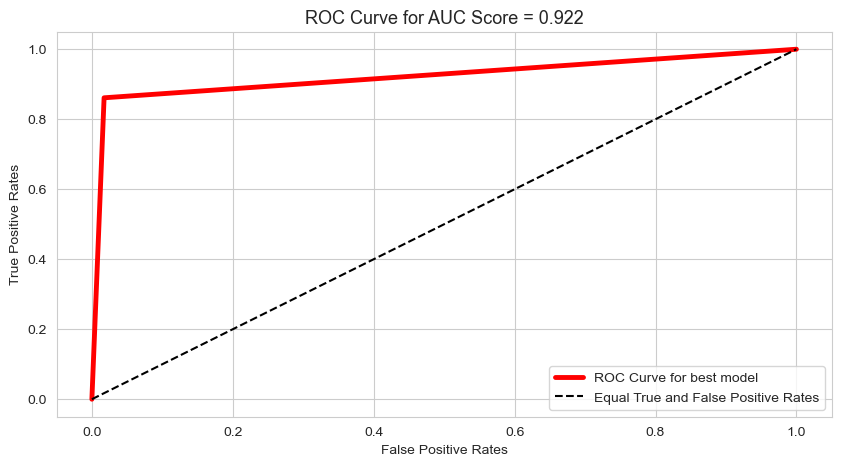

In [38]:
from sklearn.metrics import roc_curve, auc #We will also use an ROC curve to see the true positive and false positive rates.
false_positive_rates, true_positive_rates, thresholds = roc_curve(Y_Test, Test_Predictions) #We calculate the false and true 
#positive rates.
AUC_Score = auc(false_positive_rates, true_positive_rates) #We calculate AUC score.

plt.figure(figsize=(10,5))
plt.plot(false_positive_rates, true_positive_rates, color='red', lw=3.5, label=f'ROC Curve for best model')
plt.plot([0,1], [0,1], color='black', lw=1.5, linestyle='--', label='Equal True and False Positive Rates')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title(f'ROC Curve for AUC Score = {round(AUC_Score,3)}', fontsize=13)
plt.legend(loc='lower right')
plt.show()
#We display the ROC Curve for the best model to compare the true and false positive rates. We want to see the trade-offs between
#the true and false positive rates.

#Reference link for ROC Curve: https://www.w3schools.com/python/python_ml_auc_roc.asp